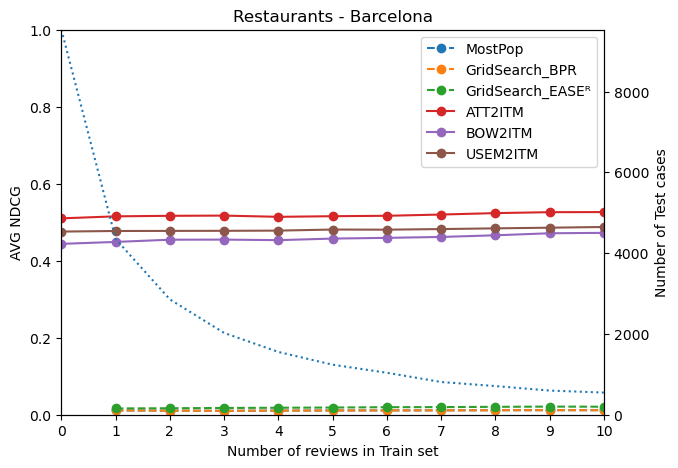

In [76]:
# Importar pandas
import matplotlib.pyplot as plt
import pandas as pd
import os

top = 10
cumulate = True

datasets = {"restaurants":["gijon", "barcelona", "madrid", "paris", "newyorkcity"],
            "pois":["barcelona", "madrid", "paris", "newyorkcity", "london"],
            "amazon":["fashion", "digital_music"]}

datasets = {"restaurants":["barcelona"]}

models = ["ATT2ITM", "BOW2ITM", "USEM2ITM"]

best_model = pd.read_csv("models/best_models.csv")

for dataset, subsets in datasets.items():
    for subset in subsets:
        fig, ax = plt.subplots(figsize=(7, 5))
        ax2 = ax.twinx()
        subset_results = pd.DataFrame(range(top+1), columns=["train_dev_items"])
        
        baseline_path = f"models/Baselines/{dataset}/{subset}/user_results.csv"
        if os.path.exists(baseline_path): 
            baselines = pd.read_csv(baseline_path).rename(columns={"cold":"train_dev_items"})
            baselines_names = baselines.columns.to_list(); baselines_names.remove("userId"); baselines_names.remove("train_dev_items")
            baselines = baselines.groupby("train_dev_items")[baselines_names].mean().reset_index()
            subset_results = subset_results.merge(baselines, how="left")

            for bl in baselines_names: # ["GridSearch_BPR", "GridSearch_EASEᴿ", "MostPop"]: 
                if cumulate: subset_results[bl] = subset_results[bl].expanding().mean()
                ax.plot(subset_results["train_dev_items"], subset_results[bl], "o--", label=bl)

        else: raise ValueError

        for model in models:
            md5 = best_model.loc[(best_model.dataset == dataset) & (best_model.subset == subset) & (best_model.model == model)]["model_md5"].values[0]
            results_path = f"models/{model}/{dataset}/{subset}/{md5}/final_user_eval.csv"
            if os.path.exists(results_path):
                results = pd.read_csv(results_path)
                results = results.groupby("cold").agg(mn=("NDCG", "mean"), n_samples=("NDCG", "count")).reset_index().rename(columns={"cold":"train_dev_items", "mn":model})
                if cumulate: results[model] = results[model].expanding().mean()
                subset_results = subset_results.merge(results, how="left")
                ax.plot(subset_results["train_dev_items"], subset_results[model], "o-", label=model)
            else:
                raise ValueError
        
        subset_results["n_samples"] = subset_results["n_samples"].fillna(0)

        ax2.plot(subset_results["train_dev_items"], subset_results["n_samples"], ":",label="")

        ax.set_ylim([0, 1])
        ax2.set_ylim([0, subset_results["n_samples"].max()])
        ax.set_ylabel('AVG NDCG')
        plt.title(f"{dataset.title()} - {subset.title()}")
        ax.set_xlabel("Number of reviews in Train set")
        ax.set_xticks(range(top+1))
        ax.set_xlim([0, top])
        ax2.set_ylabel('Number of Test cases')

        ax.legend()
        plt.show()

In [5]:
subset_results

,train_dev_items,ATT2ITM,BOW2ITM,USEM2ITM
0,0,0.524603,0.438658,0.178098
1,1,0.601652,0.537455,0.149381
2,2,0.543727,0.463537,0.149164
3,3,0.535374,0.466753,0.149068
4,4,0.505019,0.452175,0.149325
5,5,0.488397,0.423337,0.139377
6,6,0.512085,0.468437,0.140776
7,7,0.455558,0.425268,0.134205
8,8,0.444787,0.425523,0.138979
9,9,0.502080,0.424005,0.144287
